In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score
import seaborn as sns
data = pd.read_csv('student-mat.csv', delimiter=';')
print("Dataset Head:\n", data.head())

Dataset Head:
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


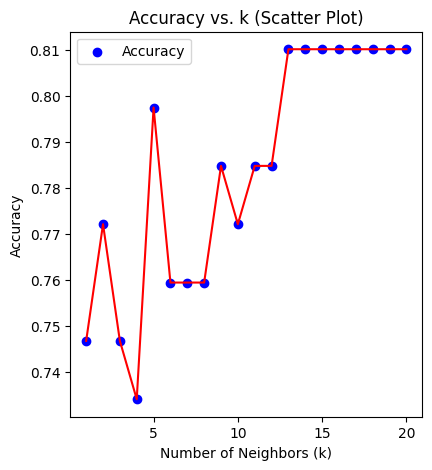

In [13]:
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
X = data.drop(['internet'], axis=1) 
y = data['internet']               
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(k_values, accuracies, color='blue', label='Accuracy')
plt.plot(k_values, accuracies, color='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k (Scatter Plot)')
plt.legend()

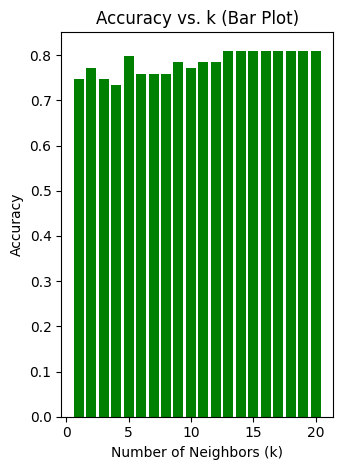

In [14]:
plt.subplot(1, 2, 2)
plt.bar(k_values, accuracies, color='green')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k (Bar Plot)')
plt.tight_layout()
plt.show()

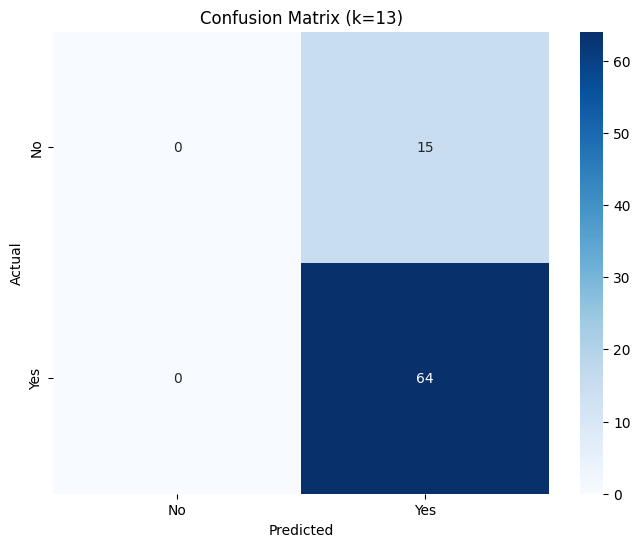

In [15]:
best_k = accuracies.index(max(accuracies)) + 1  # Find the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title(f'Confusion Matrix (k={best_k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

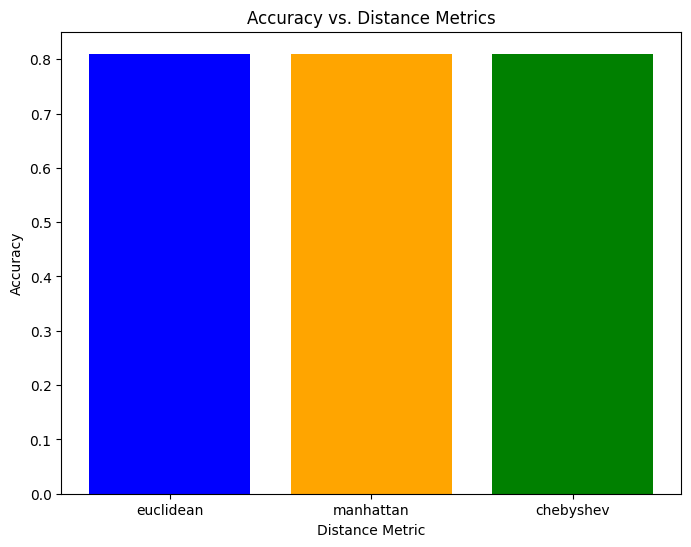

In [16]:
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
metric_accuracies = []
for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    metric_accuracies.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.bar(distance_metrics, metric_accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Distance Metrics')
plt.show()

In [17]:
print(f"Best k: {best_k}")
print("Accuracy for different distance metrics:")
for metric, acc in zip(distance_metrics, metric_accuracies):
    print(f"{metric}: {acc:.2f}")

Best k: 13
Accuracy for different distance metrics:
euclidean: 0.81
manhattan: 0.81
chebyshev: 0.81


In [18]:
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f"Precision (k={best_k}): {precision:.2f}")
print(f"Recall (k={best_k}): {recall:.2f}")
print(f"F1-Score (k={best_k}): {f1:.2f}")

Precision (k=13): 0.81
Recall (k=13): 1.00
F1-Score (k=13): 0.90


C:\Users\reshm\AppData\Local\Temp\ipykernel_20904\3623301010.py:22: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test_2D, edgecolor='k', marker='x', cmap=plt.cm.Paired, label='Test Points')


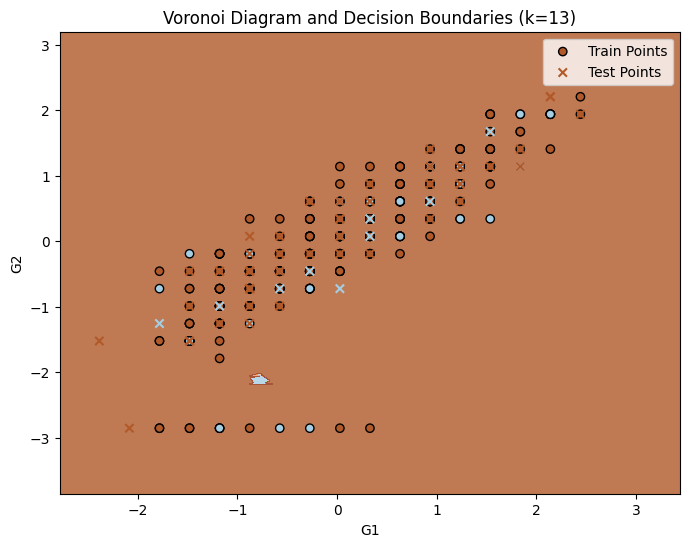

In [20]:
selected_features = ['G1', 'G2']  # Replace with any two numerical features
X_2D = data[selected_features]
X_2D_scaled = scaler.fit_transform(X_2D)
X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(X_2D_scaled, y, test_size=0.2, random_state=42)

# Train the KNN model for 2D visualization
knn_2D = KNeighborsClassifier(n_neighbors=best_k)
knn_2D.fit(X_train_2D, y_train_2D)

# Create a mesh grid
h = 0.01
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the Voronoi diagram
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train_2D, edgecolor='k', cmap=plt.cm.Paired, label='Train Points')
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test_2D, edgecolor='k', marker='x', cmap=plt.cm.Paired, label='Test Points')
plt.title(f'Voronoi Diagram and Decision Boundaries (k={best_k})')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.legend()
plt.show()

Dataset Head:
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Explained Variance Ratio: [0.1188851  0.08138104]


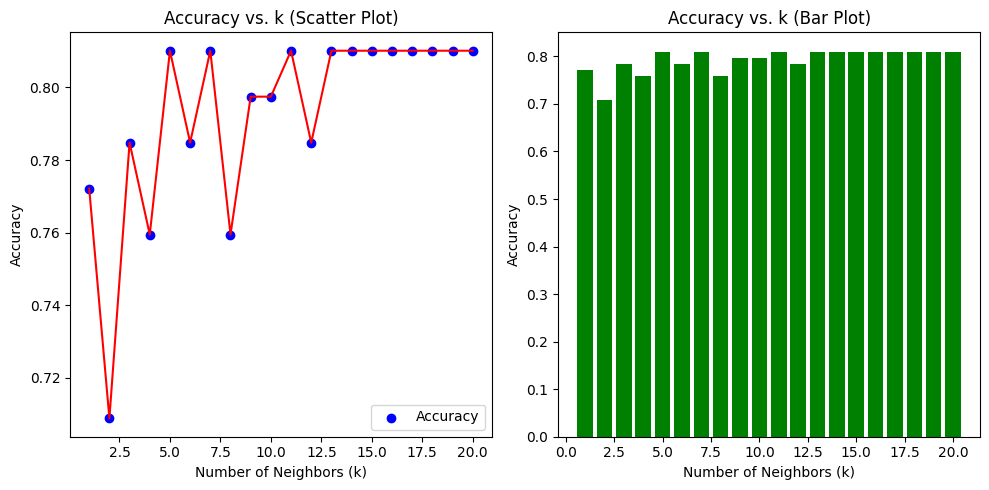

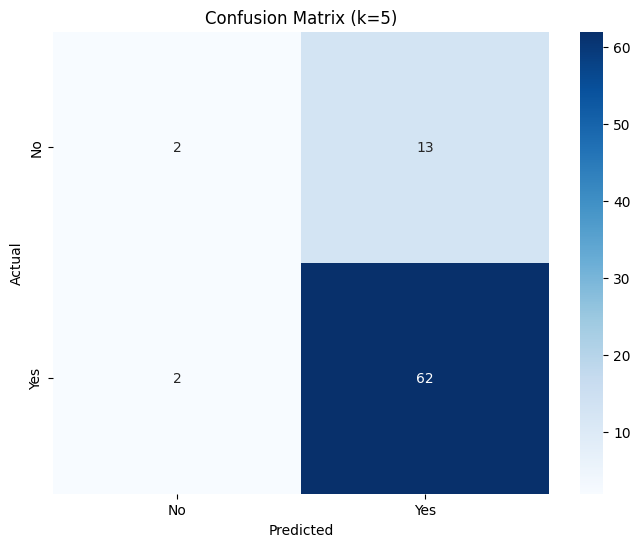

Precision (k=5): 0.83
Recall (k=5): 0.97
F1-Score (k=5): 0.89


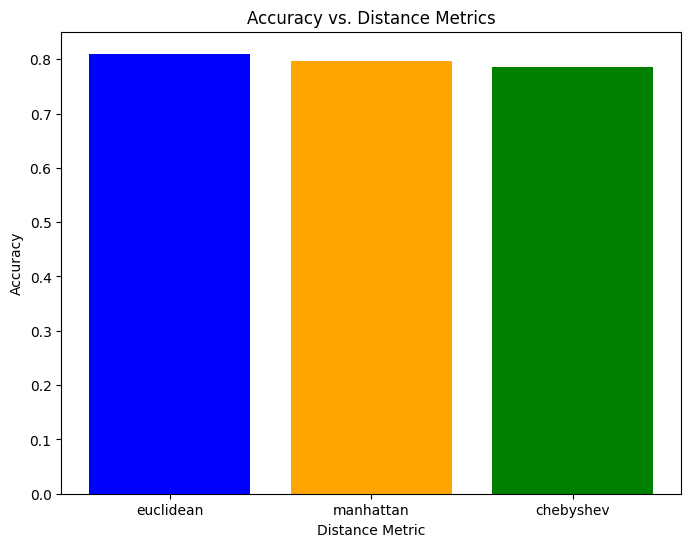

<Figure size 1000x800 with 0 Axes>

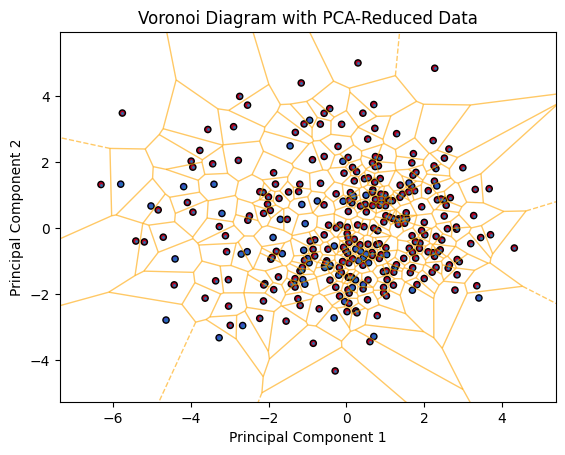

Best k: 5
Accuracy for different distance metrics:
euclidean: 0.81
manhattan: 0.80
chebyshev: 0.78


In [11]:
# After performing pca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
data = pd.read_csv('student-mat.csv', delimiter=';')
print("Dataset Head:\n", data.head())
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
X = data.drop(['internet'], axis=1)  
y = data['internet']                
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=2) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    accuracies.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(k_values, accuracies, color='blue', label='Accuracy')
plt.plot(k_values, accuracies, color='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k (Scatter Plot)')
plt.legend()
plt.subplot(1, 2, 2)
plt.bar(k_values, accuracies, color='green')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k (Bar Plot)')
plt.tight_layout()
plt.show()
best_k = accuracies.index(max(accuracies)) + 1 
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title(f'Confusion Matrix (k={best_k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f"Precision (k={best_k}): {precision:.2f}")
print(f"Recall (k={best_k}): {recall:.2f}")
print(f"F1-Score (k={best_k}): {f1:.2f}")
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
metric_accuracies = []
for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    metric_accuracies.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.bar(distance_metrics, metric_accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Distance Metrics')
plt.show()
plt.figure(figsize=(10, 8))
vor = Voronoi(X_train_pca)
voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=1, line_alpha=0.6, point_size=2)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=20)
plt.title('Voronoi Diagram with PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print(f"Best k: {best_k}")
print("Accuracy for different distance metrics:")
for metric, acc in zip(distance_metrics, metric_accuracies):
    print(f"{metric}: {acc:.2f}")